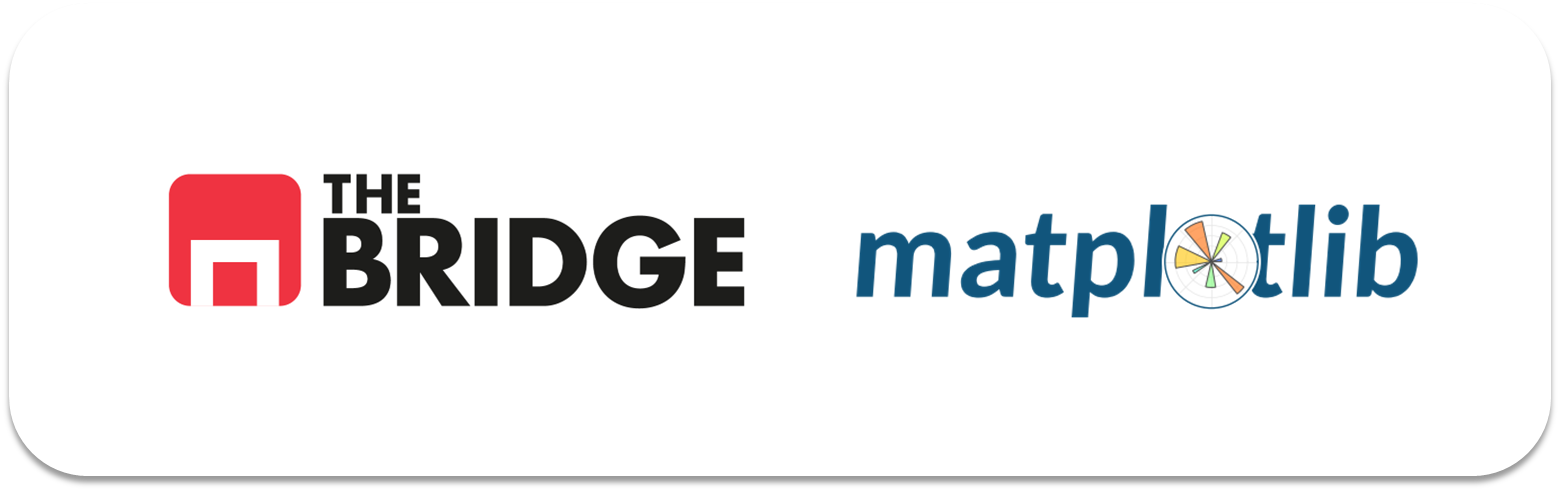

## PRACTICA OBLIGATORIA: **Visualización Básica**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.options.mode.copy_on_write = True

### Ejercicio 1

#### #1.1

- Carga el dataset de ciudades de California que está en la ruta "./data/california_cities.csv".  
- Muestra parte de su contenido y su descripción.  
- Deshazte de las filas con nulos.

In [78]:
df = pd.read_csv("./data/california_cities.csv", index_col = 0)
# ponemos la columan Unnamed:0 como el índice (está la col[0])
df

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                482 non-null    object 
 1   latd                482 non-null    float64
 2   longd               482 non-null    float64
 3   elevation_m         434 non-null    float64
 4   elevation_ft        470 non-null    float64
 5   population_total    482 non-null    int64  
 6   area_total_sq_mi    480 non-null    float64
 7   area_land_sq_mi     482 non-null    float64
 8   area_water_sq_mi    481 non-null    float64
 9   area_total_km2      477 non-null    float64
 10  area_land_km2       478 non-null    float64
 11  area_water_km2      478 non-null    float64
 12  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 52.7+ KB


In [80]:
df.isna().sum().sort_values(ascending = False)
# podría reconstruir los nulos de elevation_m con elevation_ft,
# pero puede dar problemas si hay erratas

elevation_m           48
elevation_ft          12
area_water_percent     5
area_total_km2         5
area_water_km2         4
area_land_km2          4
area_total_sq_mi       2
area_water_sq_mi       1
city                   0
latd                   0
longd                  0
area_land_sq_mi        0
population_total       0
dtype: int64

In [ ]:
# si quisiéramos, convertimos todos los pies a metros
df["elevation_m_from_ft"] = df.elevation_ft*0.3048 

# para ver las divergencias entre columna y su cálculo
# cities.iloc[abs(cities["elevation_m"]-cities["elevation_m_from_ft"]).nlargest(10).index]

In [ ]:
# también podríamos sustituir nulos por millas
df.loc[df["elevation_m"].isna(), "elevation_m"] = df.loc[df["elevation_m"].isna(), "elevation_m_from_ft"]

In [84]:
df = df.dropna()
df.isnull().sum()

city                   0
latd                   0
longd                  0
elevation_m            0
elevation_ft           0
population_total       0
area_total_sq_mi       0
area_land_sq_mi        0
area_water_sq_mi       0
area_total_km2         0
area_land_km2          0
area_water_km2         0
area_water_percent     0
elevation_m_from_ft    0
dtype: int64

#### #1.2  

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro.  

Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, rojo, aceituna, marrón, con trasparencia)  

2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand ITC", tamaño 18, color azul acero o "steelblue")
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

In [85]:
df.columns

Index(['city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent', 'elevation_m_from_ft'],
      dtype='object')

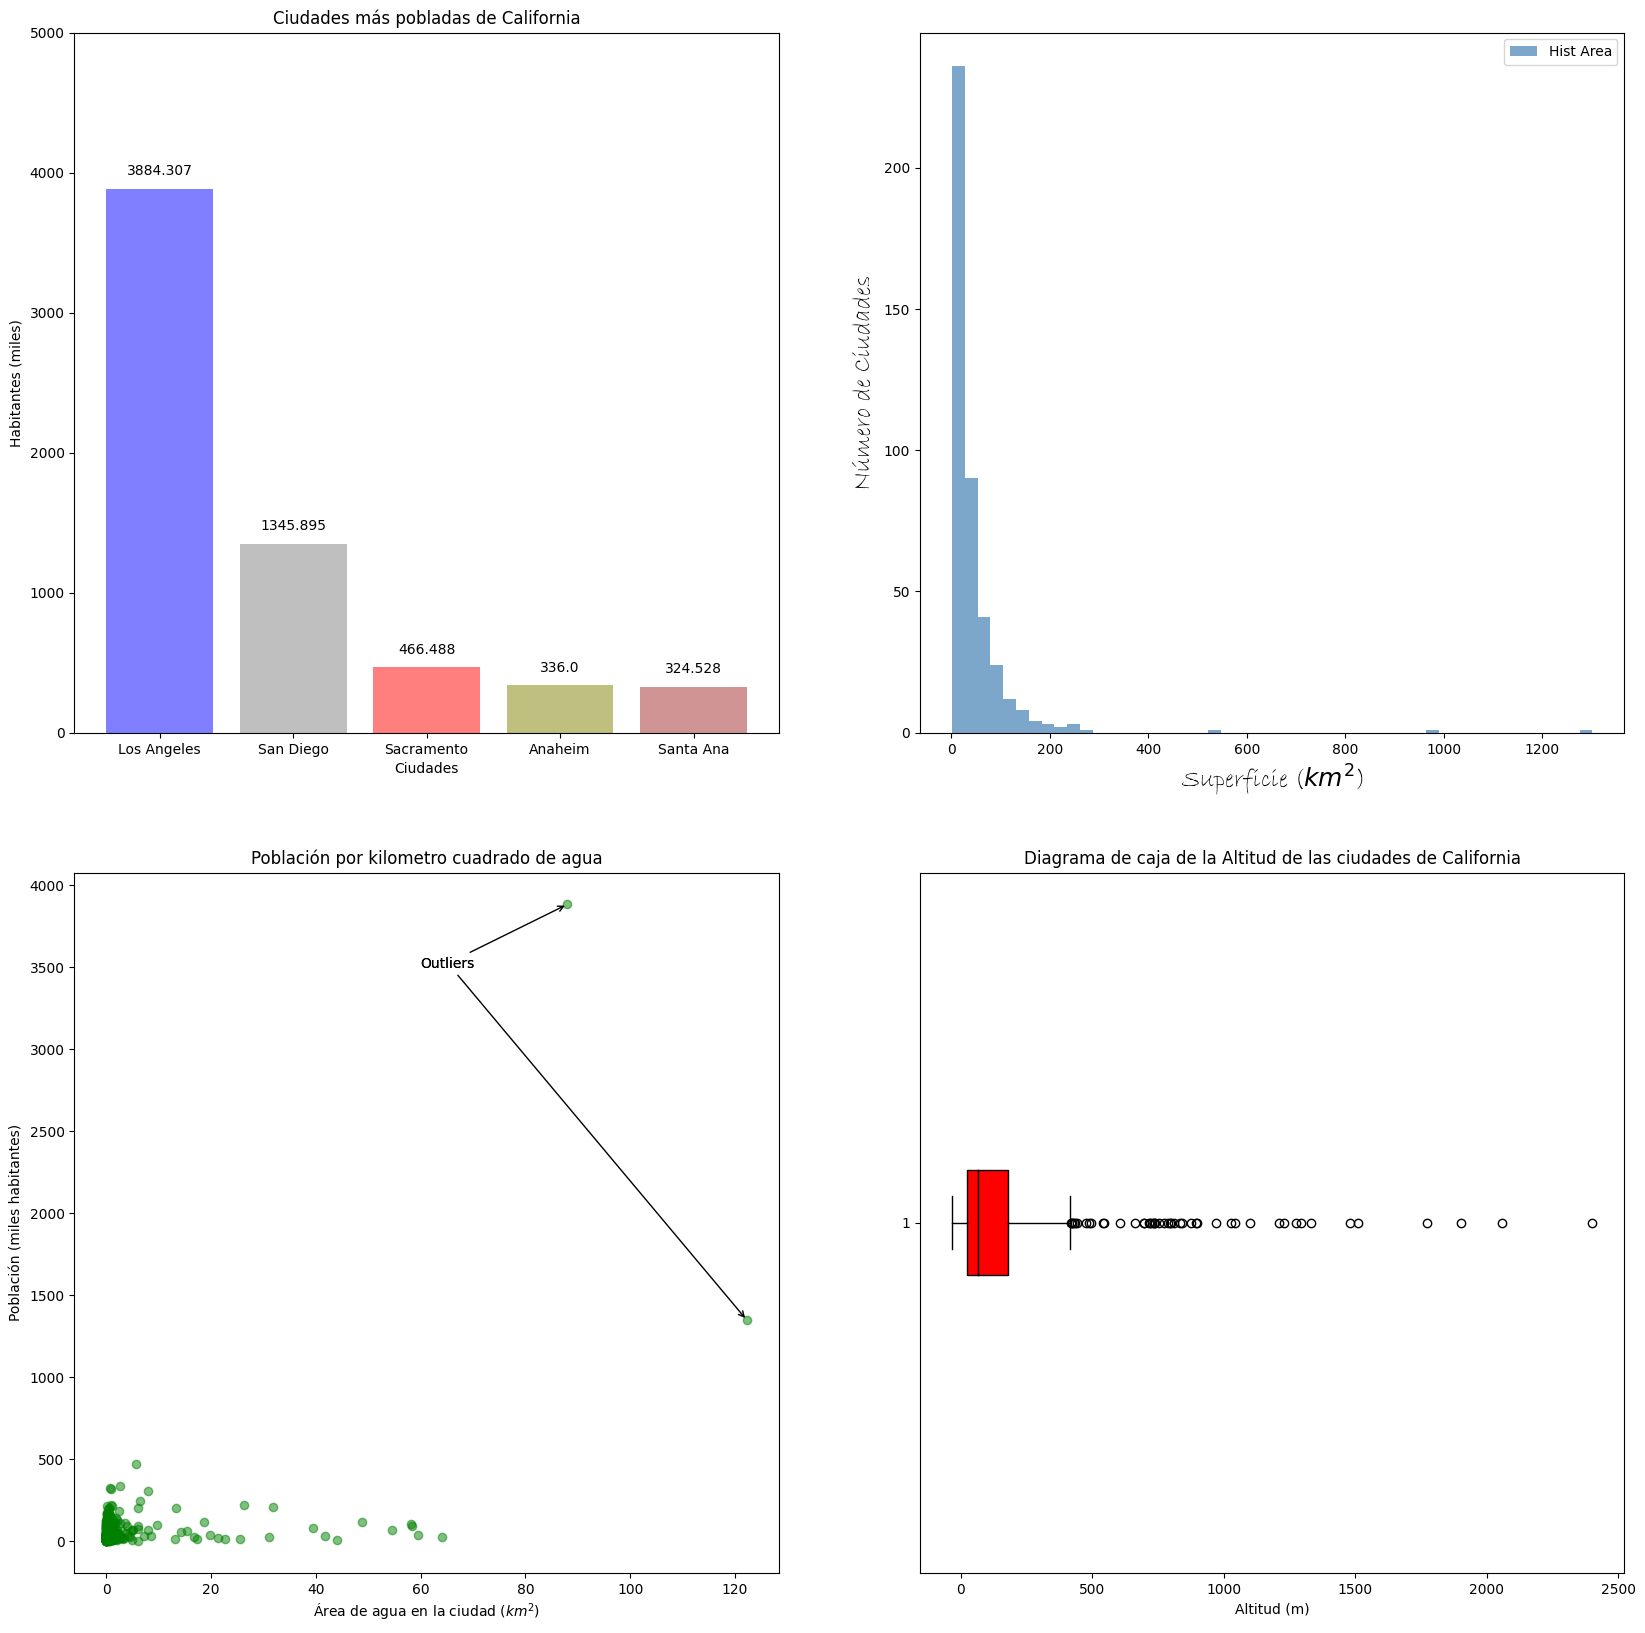

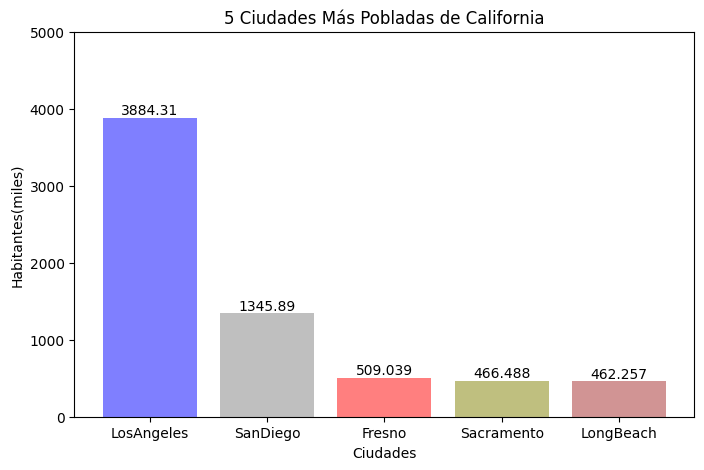

In [113]:
#1. Las ciudades más pobladas
top5 = df[["city", "population_total"]].nlargest(5, columns = "population_total").copy()
top5 = top5.set_index("city")

# si usamos Matlib, empezando siempre creando la figura (el contenedor de los axes = subplots)
plt.figure(figsize=(8,5))

plt.ylim([0,5000])
plt.ylabel("Habitantes(miles)")
plt.xlabel("Ciudades")
plt.title("5 Ciudades Más Pobladas de California")


# solución de compañero
container = plt.bar(x = top5.index,
                    height = top5["population_total"]/1000,
                    color = ["blue", "gray", "red", "olive", "brown", "cyan"],
                    alpha=0.5)

plt.bar_label(container)

# al profe lo no le gustan los ";" al final, sino esto:
plt.show()

In [ ]:
# pasarán solución creando función y con más de matlib
# pero más limpio lo que pasó un compañero (anterior)

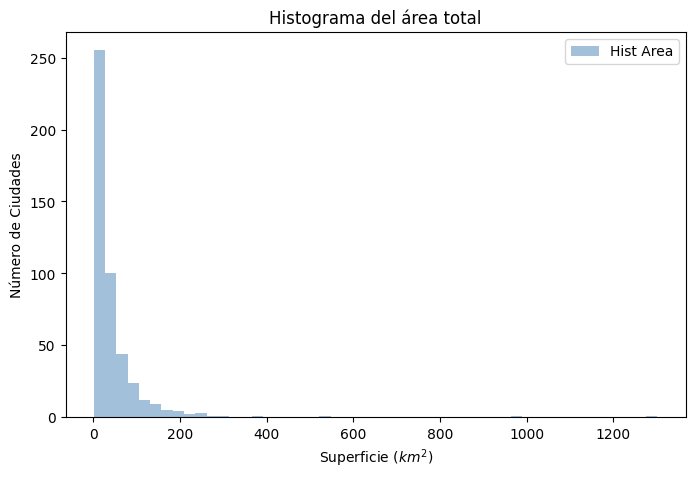

In [ ]:
#2. 2. Histograma del área total ocupada por las ciudades. (50 bins, 
# fuente = "Bradley Hand ITC", tamaño 18, color azul acero o "steelblue")
plt.figure(figsize=(8,5))

plt.hist(df["area_total_km2"],
         color= "steelblue",
         alpha=0.5,
         bins=50,
         label = "Hist Area")

plt.xlabel("Superficie ($km^2$)")
plt.ylabel("Número de Ciudades")
plt.legend()
plt.title("Histograma del área total") #no lo pedía, pero queda mejor


plt.show()

# Rodrigo no exigue poner el formato de cursivas, porque es un "jaleo". No renta
# 'Google fonts' ofrece fuentes gratis si queremos, porque muchas son de pago


AttributeError: 'Annotation' object has no property 'arroprops'

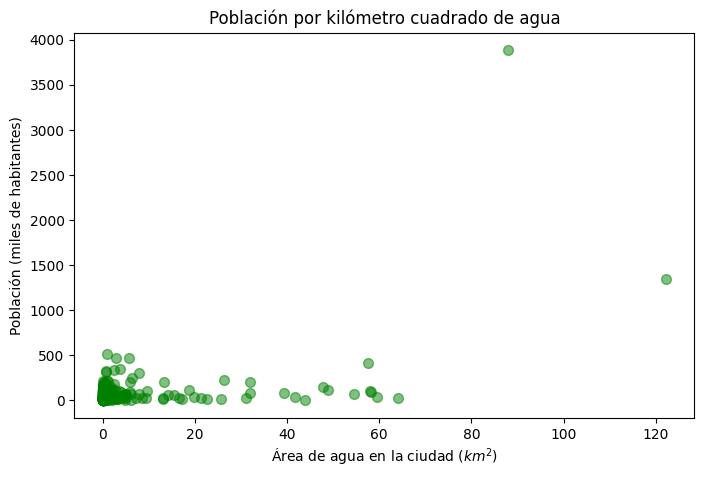

In [126]:
#3. El scatter de área de agua de un ciudad con su poblacion.
fig = plt.figure(figsize= (8,5))

# Scatter plot
plt.scatter(
    x= df["area_water_km2"],
    y= df["population_total"]/1000, # /1000 para que quede en miles, no millones
    s= 50, # tamaño de la burbuja,
    color= "green",
    alpha= 0.5
)

# Etiquetas
plt.title("Población por kilómetro cuadrado de agua")
plt.xlabel("Área de agua en la ciudad ($km^2$)")
plt.ylabel("Población (miles de habitantes)")

# Anotaciones y flechas
outlier_1_y = top5.population_total.nlargest(2).iloc[0]
outlier_2_y = top5.population_total.nlargest(2).iloc[1]
outlier_1_x = df.loc[df.population_total == outlier_1_y, "area_water_km2"].values[0]
outlier_2_x = df.loc[df.population_total == outlier_2_y, "area_water_km2"].values[0]


xytext=(60,2000)

plt.annotate(xy=(outlier_1_x, outlier_1_y/1000),
    xytext= xytext,
    text= "Outliers",
    arroprops= dict(arrowstyle="->")
)

plt.annotate(xy=(outlier_2_x, outlier_2_y/1000),
    xytext=(60,2000),
    text="Outliers",
    arroprops= dict(arrowstyle="->")
)

plt.show()

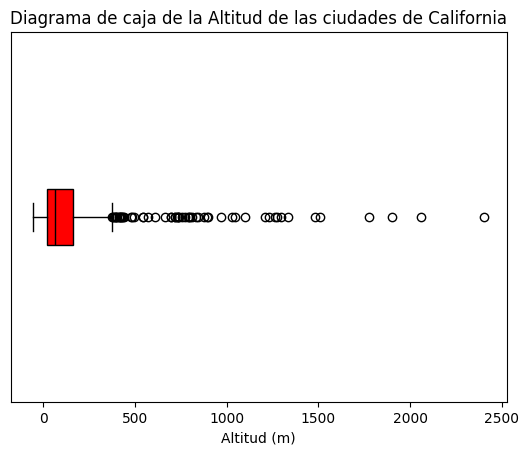

In [ ]:
#4. El boxplot de la altura de las ciudades.
plt.boxplot(df["elevation_m"], 
            vert = False, 
            boxprops = dict(facecolor = "red"), medianprops = dict(color= "black"),
            patch_artist= True )
plt.xlabel("Altitud (m)")
plt.title("Diagrama de caja de la Altitud de las ciudades de California")
plt.yticks([])

plt.show()

In [131]:
# para solución, función que separa nombres:
def separa_nombre(nombre):
    nuevo = nombre[0]
    for letra in nombre[1:]:
        if letra == letra.upper():
            nuevo += " "
        nuevo += letra
    return nuevo

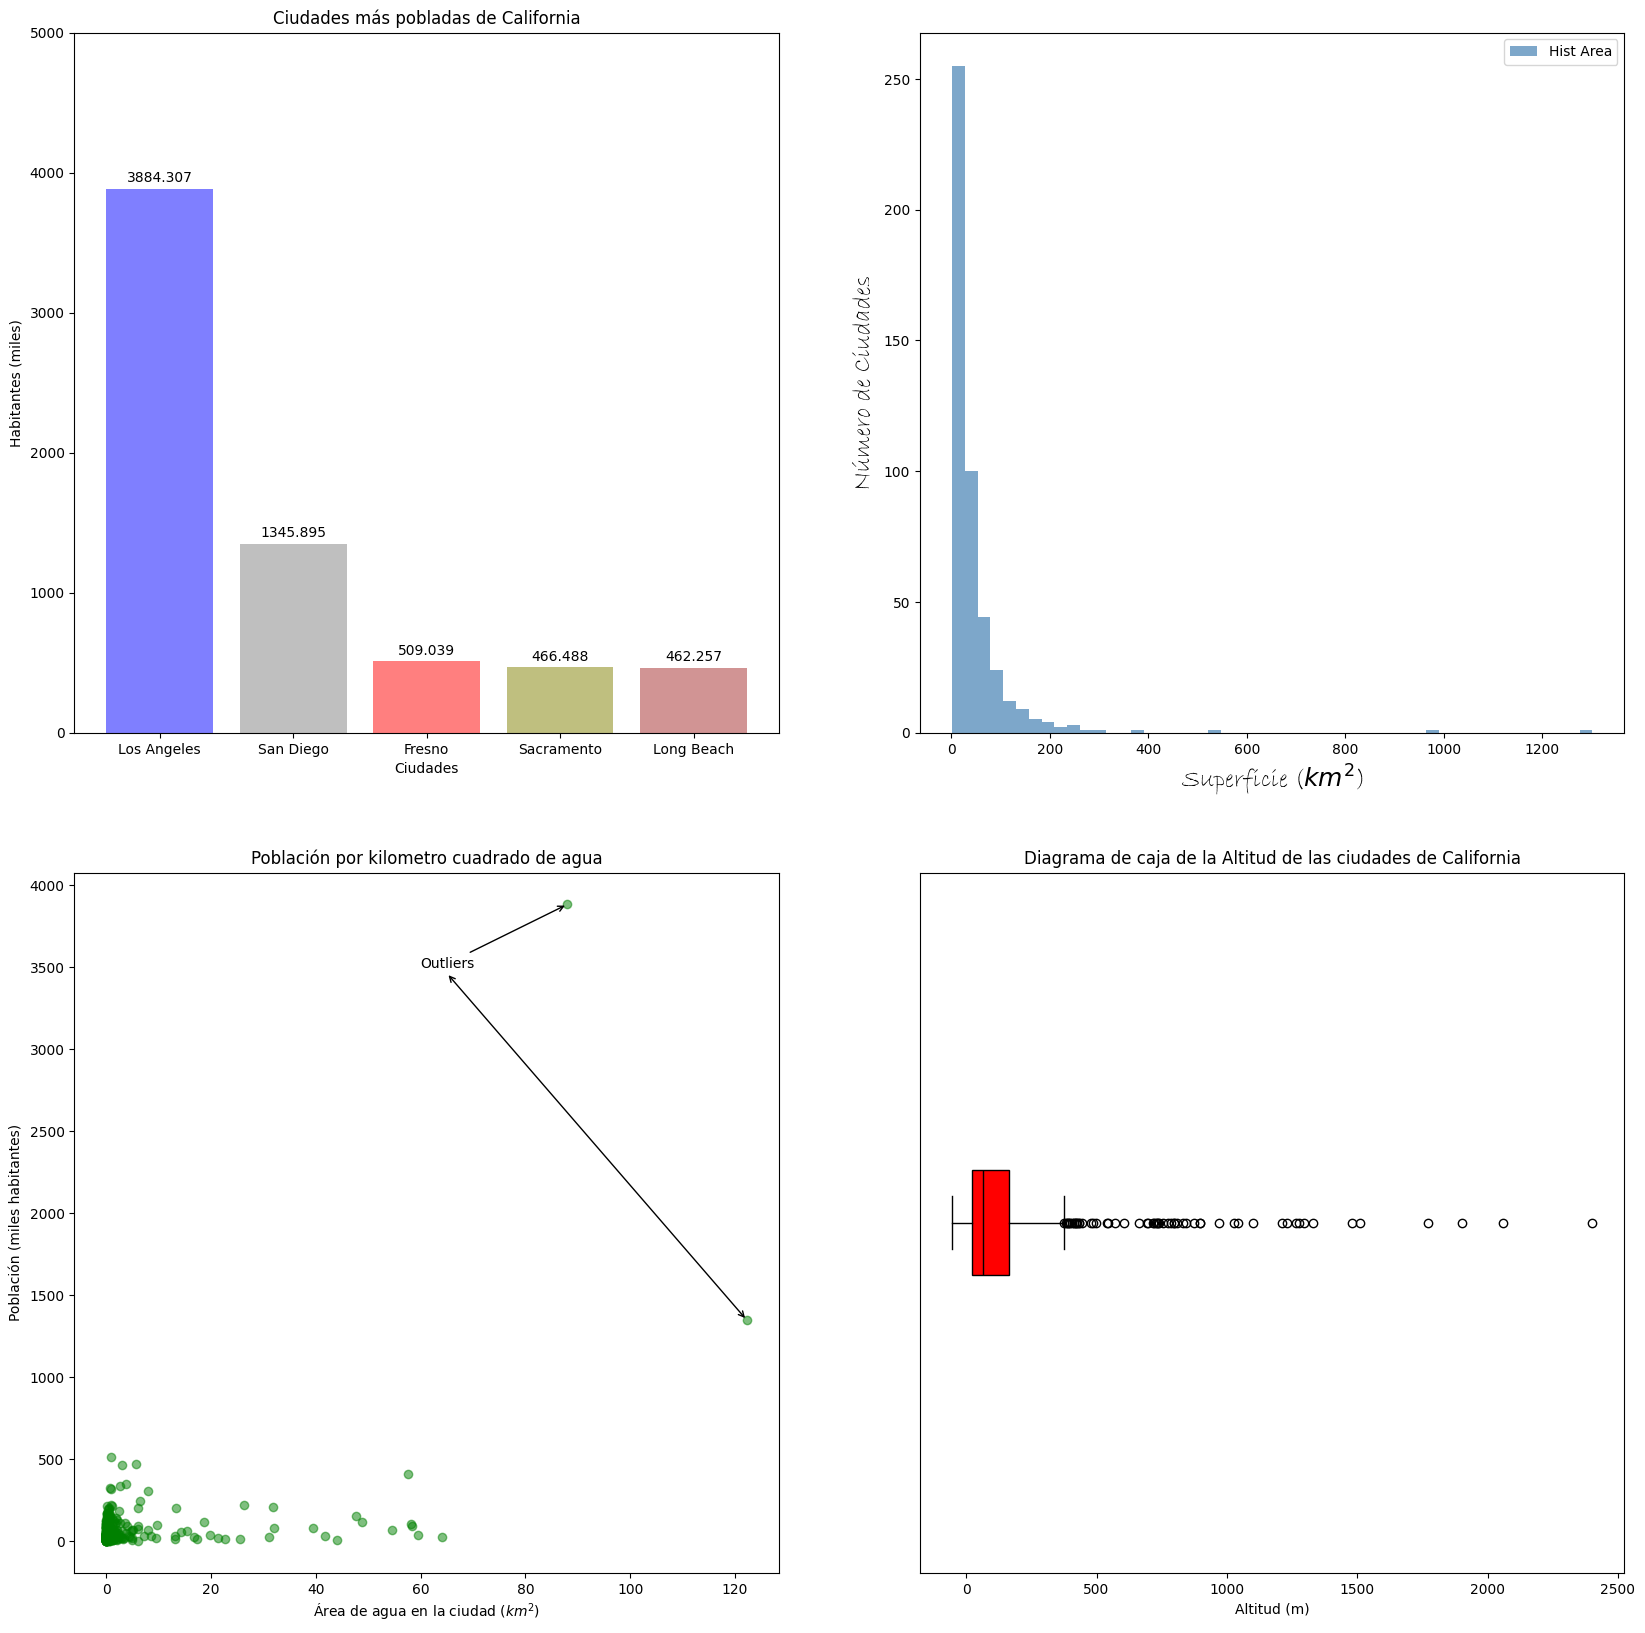

In [132]:
# SOLUCIÓN CON SUBPLOT
# Todas juntas
plt.figure(figsize=(20,20))

# Primera figura
plt.subplot(2,2,1)

ciudades_mas_pobladas = df.loc[df.population_total.nlargest(5).index,["city","population_total"]]
ciudades = [ separa_nombre(ciudad) for ciudad in ciudades_mas_pobladas["city"].to_list()]
colores = ["blue","gray","red","olive","brown"]

plt.bar(x= ciudades, height= ciudades_mas_pobladas["population_total"]/1000, color = colores, alpha = 0.5)

plt.ylim([0,5000])
plt.ylabel("Habitantes (miles)")
plt.xlabel("Ciudades")
plt.title("Ciudades más pobladas de California")

ciudades_mas_pobladas.set_index("city", inplace = True)
for indice, ciudad in enumerate(ciudades_mas_pobladas.index):
    poblacion = ciudades_mas_pobladas.loc[ciudad,"population_total"]/1000
    plt.text(ciudades[indice], poblacion + 50, f"{poblacion}", ha = "center")

# Segunda figura
plt.subplot(2,2,2)

plt.hist(df["area_total_km2"], color = "steelblue", alpha = 0.7, bins = 50, label = "Hist Area")

plt.xlabel("Superficie ($km^2$)", fontdict = dict(family= "Bradley Hand ITC", size = 18))
plt.ylabel("Número de Ciudades", fontdict= dict(family = "Bradley Hand ITC", size = 18))
plt.legend()

# Tercera figura
plt.subplot(2,2,3)

plt.scatter(df["area_water_km2"], df["population_total"]/1000, alpha = 0.5, color = "green")

plt.xlabel("Área de agua en la ciudad ($km^2$)")
plt.ylabel("Población (miles habitantes)")
plt.title("Población por kilometro cuadrado de agua")

outlier_1_y = ciudades_mas_pobladas.population_total.max()
outlier_2_y = ciudades_mas_pobladas.population_total.nlargest(2).iloc[1]
outlier_1_x = df.loc[df.population_total == outlier_1_y,"area_water_km2"].values[0]
outlier_2_x = df.loc[df.population_total == outlier_2_y,"area_water_km2"].values[0]

xytext= (60,3500)
text = "Outliers"

plt.annotate(xy= (outlier_1_x,outlier_1_y/1000), xytext= xytext, text = text, arrowprops= dict(arrowstyle = "->"))

plt.annotate(xy= (outlier_2_x,outlier_2_y/1000), xytext= xytext, text = " " * len(text), arrowprops= dict(arrowstyle = "<->"))

# Cuarta figura
plt.subplot(2,2,4)

plt.boxplot(df["elevation_m"], vert = False, boxprops = dict(facecolor = "red"), medianprops = dict(color= "black"),
            patch_artist= True )

plt.xlabel("Altitud (m)")
plt.title("Diagrama de caja de la Altitud de las ciudades de California")
plt.yticks([])

plt.show()

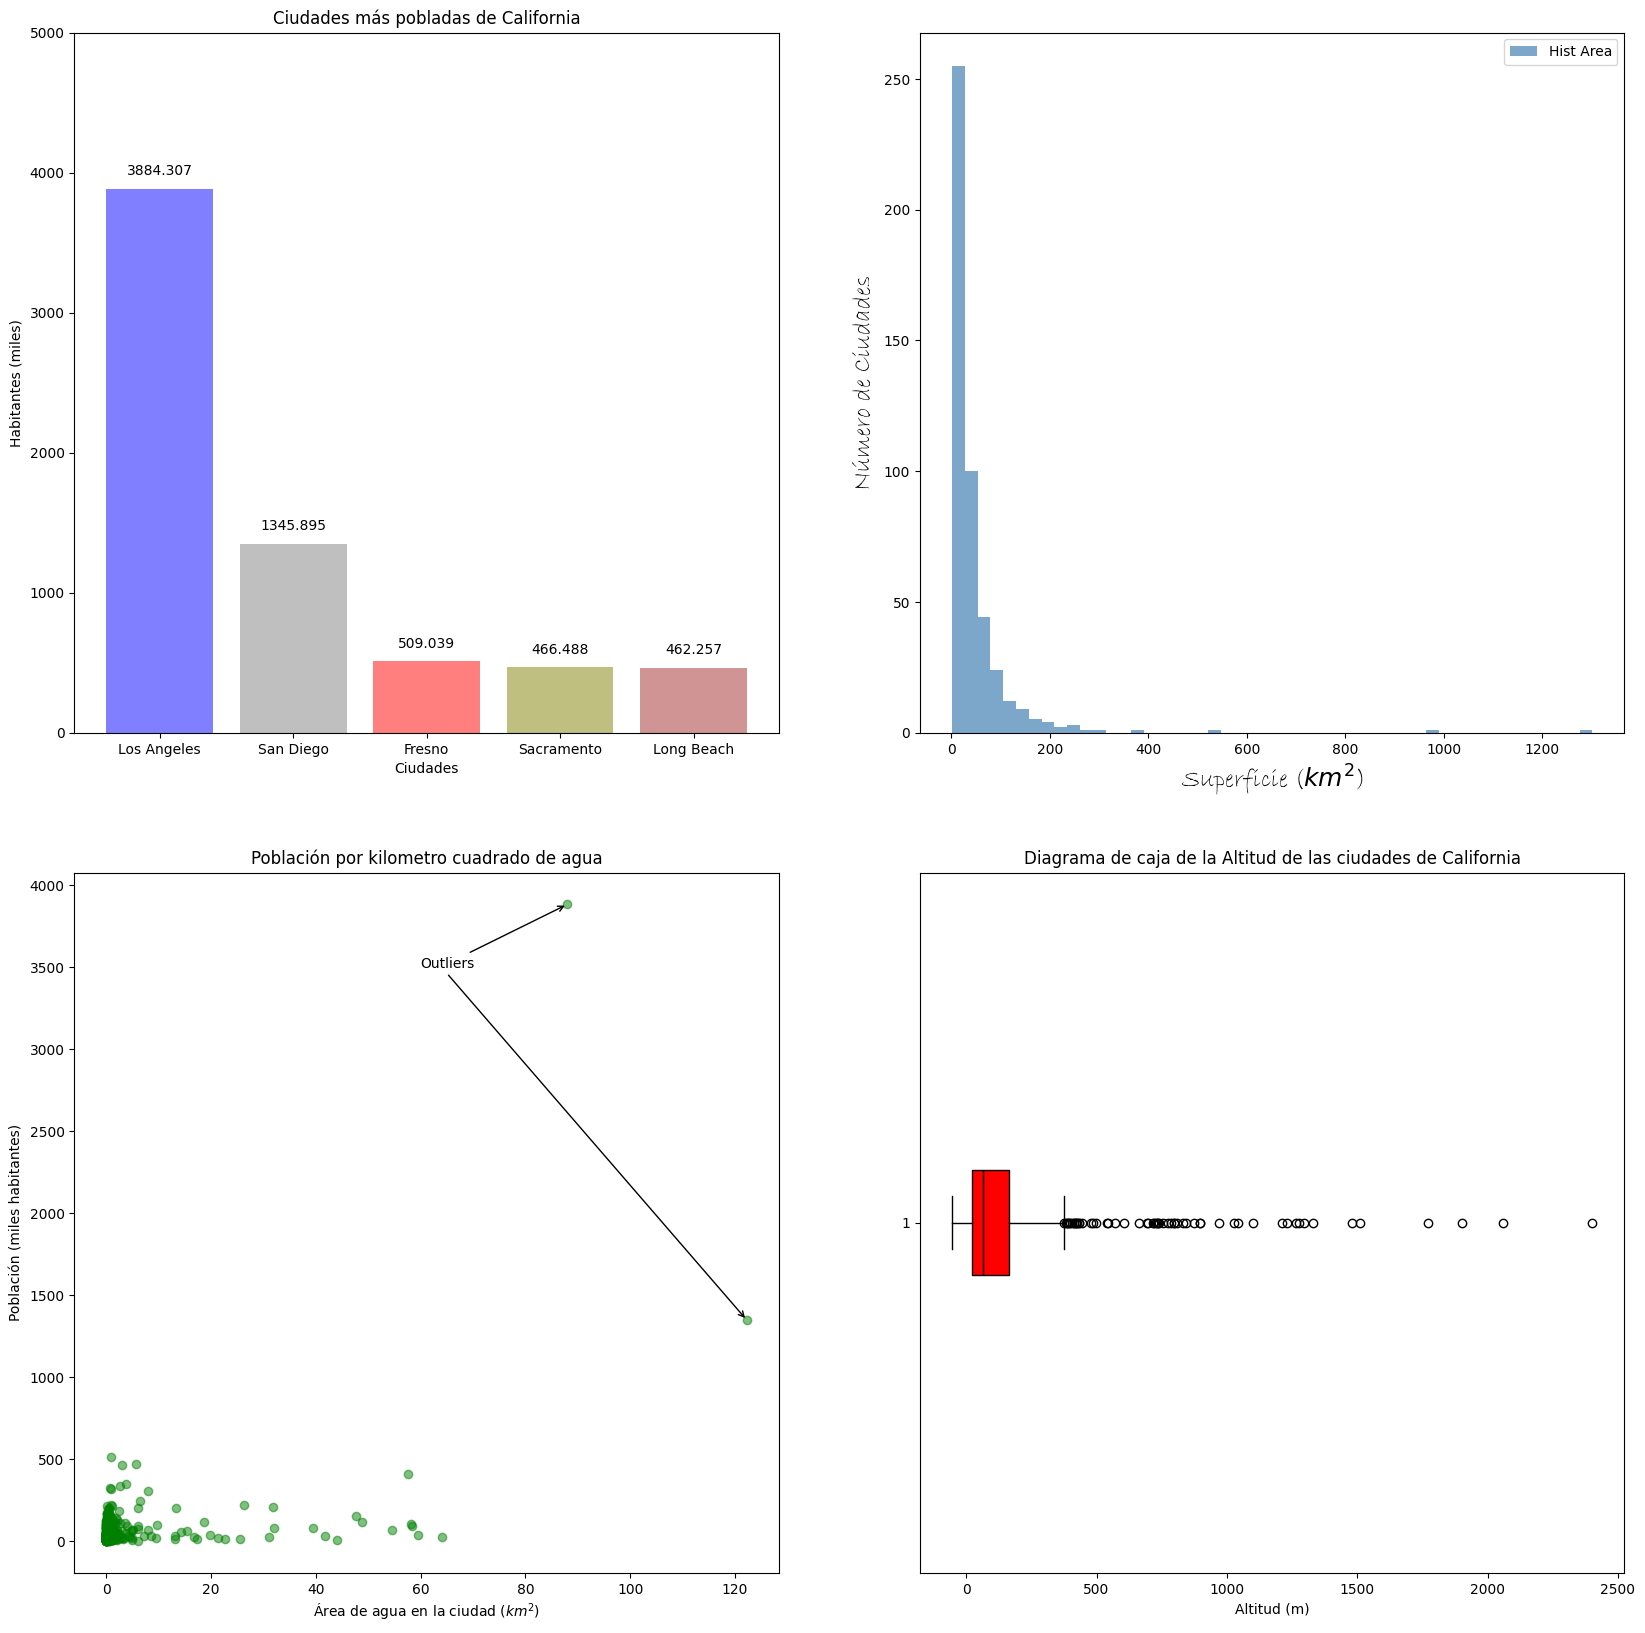

In [133]:
# SOLUCIÓN CON SUBPLOTSSSS
# Todas juntas

fig, axs = plt.subplots(2,2, figsize = (20,20))
axs = axs.flatten()

# Primera figura
primera = axs[0]
ciudades_mas_pobladas = df.loc[df.population_total.nlargest(5).index, ["city","population_total"]]
ciudades = [separa_nombre(ciudad) for ciudad in ciudades_mas_pobladas["city"].to_list()]
colores = ["blue","gray","red","olive","brown"]

primera.bar(x= ciudades, height= ciudades_mas_pobladas["population_total"]/1000, color = colores, alpha = 0.5)
primera.set_ylim([0,5000])
primera.set_ylabel("Habitantes (miles)")
primera.set_xlabel("Ciudades")

ciudades_mas_pobladas.set_index("city", inplace = True)
for indice, ciudad in enumerate(ciudades_mas_pobladas.index):
    poblacion = ciudades_mas_pobladas.loc[ciudad,"population_total"]/1000
    primera.text(ciudades[indice], poblacion + 100, f"{poblacion}", ha = "center")
primera.set_title("Ciudades más pobladas de California")

# Segunda gráfica
segunda = axs[1]
segunda.hist(df["area_total_km2"], color = "steelblue", alpha = 0.7, bins = 50, label = "Hist Area")
segunda.set_xlabel("Superficie ($km^2$)", fontdict = dict(family = "Bradley Hand itc", size = 18))
segunda.set_ylabel("Número de Ciudades", fontdict= dict(family = "Bradley Hand itc", size = 18))
segunda.legend()


# Tercera gráfica
tercera = axs[2]
tercera.scatter(df["area_water_km2"], df["population_total"]/1000, alpha = 0.5, color = "green")
tercera.set_xlabel("Área de agua en la ciudad ($km^2$)")
tercera.set_ylabel("Población (miles habitantes)")
tercera.set_title("Población por kilometro cuadrado de agua")
outlier_1_y = ciudades_mas_pobladas.population_total.max()
outlier_2_y = ciudades_mas_pobladas.population_total.nlargest(2).iloc[1]
outlier_1_x = df.loc[df.population_total == outlier_1_y,"area_water_km2"].values[0]
outlier_2_x = df.loc[df.population_total == outlier_2_y,"area_water_km2"].values[0]

xytext= (60,3500)
text = "Outliers"

tercera.annotate(xy= (outlier_1_x,outlier_1_y/1000), xytext= xytext, text = text,
              arrowprops= dict(arrowstyle = "->"))
tercera.annotate(xy= (outlier_2_x,outlier_2_y/1000), xytext= xytext, text = " " * len(text),
              arrowprops= dict(arrowstyle = "->"))


# Cuarta gráfica
cuarta = axs[3]
cuarta.boxplot(df["elevation_m"].dropna(), vert = False, boxprops = dict(facecolor = "red"),
               medianprops = dict(color= "black"), patch_artist= True)
cuarta.set_xlabel("Altitud (m)")
cuarta.set_title("Diagrama de caja de la Altitud de las ciudades de California");


#### #1.3

Graba la figura en un archivo .png y sube el archivo a tu repositorio personal junto con el notebook.

In [134]:
# se puede hacer con código o a mano (botón de la propia gráfica)